In [ ]:
# exploration.ipynb
#Project: Pedestrian Corridor Analysis — Cleaning & Merging  
#Author: Shohruzbek Abdumuminov and Ragib Asif
#Purpose: Look through datasets to identify any discrepancies in street naming conventions between the Pedestrian Counts and Pedestrian Demand datasets. 
# Also looking for any missing or malformed entries that may require cleaning before merging the datasets later on.

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSVs
counts = pd.read_csv("../data-raw/pedestrian_counts.csv")
demand = pd.read_csv("../data-raw/pedestrian_demand.csv")

# Preview
print("Pedestrian Counts:")
display(counts.head(5))
print(counts.shape, counts.columns.tolist())

print("\nPedestrian Demand:")
display(demand.head(5))
print(demand.shape, demand.columns.tolist())


Pedestrian Counts:


,the_geom,OBJECTID,Loc,Borough,Street_Nam,From_Stree,To_Street,Iex,May07_AM,May07_PM,...,Oct23_MD,June24_AM,June24_PM,June24_MD,Oct24_AM,Oct24_PM,Oct24_MD,May25_AM,May25_PM,May25_MD
0,POINT (-73.90459140730678 40.87919896648574),1,1,Bronx,Broadway,West 231st Street,Naples Terrace,N,"1,189","4,094",...,"1,745",901,"3,482","2,052","1,031","4,097",2229,811,"2,420","2,224"
1,POINT (-73.92188432870218 40.82662794123292),2,2,Bronx,East 161st Street,Gra Concourse,Sheridan Avenue,Y,"1,511","3,184",...,"1,287","2,113","4,155","1,493","3,016","4,685",1655,"2,928","4,168","2,468"
2,POINT (-73.89535781584335 40.86215460031517),3,3,Bronx,East Fordham Road,Valentine Avenue,Tiebout Avenue,Y,"1,832","12,311",...,"2,453","1,485","7,125","3,819","1,689","6,405",4417,"1,599","4,936","4,688"
3,POINT (-73.87892467324478 40.8812869959873),4,4,Bronx,East Gun Hill Road,Bainbridge Avenue,Rochambeau Avenue,N,764,"2,673",...,807,"1,394","2,023","1,190","1,495","2,474",1073,"1,261","1,779","1,133"
4,POINT (-73.88956389732787 40.844636776717664),5,5,Bronx,East Tremont Avenue,Prospect Avenue,Clinton Avenue,N,650,"2,538",...,"1,115",550,"1,455","1,563",725,"2,329",1888,714,"1,585","1,522"


(114, 113) ['the_geom', 'OBJECTID', 'Loc', 'Borough', 'Street_Nam', 'From_Stree', 'To_Street', 'Iex', 'May07_AM', 'May07_PM', 'May07_MD', 'Sept07_AM', 'Sept07_PM', 'Sept07_MD', 'May08_AM', 'May08_PM', 'May08_MD', 'Sept08_AM', 'Sept08_PM', 'Sept08_MD', 'May09_AM', 'May09_PM', 'May09_MD', 'Sept09_AM', 'Sept09_PM', 'Sept09_MD', 'May10_AM', 'May10_PM', 'May10_MD', 'Sept10_AM', 'Sept10_PM', 'Sept10_MD', 'May11_AM', 'May11_PM', 'May11_MD', 'Sept11_AM', 'Sept11_PM', 'Sept11_MD', 'May12_AM', 'May12_PM', 'May12_MD', 'Sept12_AM', 'Sept12_PM', 'Sept12_MD', 'May13_AM', 'May13_PM', 'May13_MD', 'Sept13_AM', 'Sept13_PM', 'Sept13_MD', 'May14_AM', 'May14_PM', 'May14_MD', 'Sept14_AM', 'Sept14_PM', 'Sept14_MD', 'May15_AM', 'May15_PM', 'May15_MD', 'Sept15_AM', 'Sept15_PM', 'Sept15_MD', 'May16_AM', 'May16_PM', 'May16_MD', 'Sept16_AM', 'Sept16_PM', 'Sept16_MD', 'May17_AM', 'May17_PM', 'May17_MD', 'Sept17_AM', 'Sept17_PM', 'Sept17_MD', 'May18_AM', 'May18_PM', 'May18_MD', 'Sept18_AM', 'Sept18_PM', 'Sept18_MD'

,the_geom,BoroCode,BoroName,BoroCD,CounDist,AssemDist,StSenDist,CongDist,street,segmentid,Rank,PMP_ID,NTA2020,Boro,Category,NTAName,FEMAFldz,FEMAFldT,HrcEvac,SHAPE_Leng
0,MULTILINESTRING ((-73.81665096623519 40.674537...,4,Queens,410,"28,32",31,10,5,122 STREET,55131,4,52434,QN1001,QN,Community,South Ozone Park,X,AREA OF MINIMAL FLOOD HAZARD,"5,6",326.224891603
1,MULTILINESTRING ((-74.25422309679644 40.506165...,5,Staten Island,503,51,62,24,11,WARDS POINT AVENUE,16,5,79811,SI0305,SI,Baseline,Tottenville-Charleston,X,AREA OF MINIMAL FLOOD HAZARD,2,133.964226616
2,MULTILINESTRING ((-73.82885385076081 40.698186...,4,Queens,409,29,24,14,5,120 STREET,56031,5,50784,QN0902,QN,Baseline,Richmond Hill,X,AREA OF MINIMAL FLOOD HAZARD,NaN,220.503353578
3,MULTILINESTRING ((-73.78519954748839 40.718913...,4,Queens,408,24,24,"11,14",5,CROYDON ROAD,180320,5,49677,QN0804,QN,Baseline,Jamaica Estates-Holliswood,X,AREA OF MINIMAL FLOOD HAZARD,NaN,33.1805231703
4,MULTILINESTRING ((-74.15639270712379 40.632493...,5,Staten Island,501,49,61,23,11,MAPLE PARKWAY,8394,4,70756,SI0107,SI,Community,Mariner's Harbor-Arlington-Graniteville,X,AREA OF MINIMAL FLOOD HAZARD,"5,6",410.31735479


(127277, 20) ['the_geom', 'BoroCode', 'BoroName', 'BoroCD', 'CounDist', 'AssemDist', 'StSenDist', 'CongDist', 'street', 'segmentid', 'Rank', 'PMP_ID', 'NTA2020', 'Boro', 'Category', 'NTAName', 'FEMAFldz', 'FEMAFldT', 'HrcEvac', 'SHAPE_Leng']


In [6]:
# Missing values check
print("\nMissing values in counts:")
display(counts.isna().sum().sort_values(ascending=False).head(10))

print("\nMissing values in demand:")
display(demand.isna().sum().sort_values(ascending=False).head(10))



Missing values in counts:


To_Street    18
the_geom      0
Sept17_AM     0
Oct20_AM      0
May19_MD      0
May19_PM      0
May19_AM      0
Sept18_MD     0
Sept18_PM     0
Sept18_AM     0
dtype: int64


Missing values in demand:


HrcEvac     66551
FEMAFldT     5705
FEMAFldz       27
NTAName         5
the_geom        0
BoroCode        0
Category        0
Boro            0
NTA2020         0
PMP_ID          0
dtype: int64

In [7]:
# Boroughs and Street names summary
print("\nUnique Boroughs in counts:", counts['Borough'].unique())
print("Unique Boroughs in demand:", demand['BoroName'].unique())

print("\nSample Streets in counts:", counts['Street_Nam'].unique()[:10])
print("Sample Streets in demand:", demand['street'].unique()[:10])

# Look at demand categories
print("\nDemand Categories:", demand['Category'].value_counts())

# Descriptive stats of counts
numeric_cols = [c for c in counts.columns if 'AM' in c or 'PM' in c or 'MD' in c]
counts[numeric_cols].describe().T.head(10)



Unique Boroughs in counts: ['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Isla'
 'East River Bridges' 'Harlem River Bridges']
Unique Boroughs in demand: ['Queens' 'Staten Island' 'Manhattan' 'Bronx' 'Brooklyn' 'Brooklyn,Queens'
 'Manhattan,Brooklyn' 'Manhattan,Bronx' 'Manhattan,Queens']

Sample Streets in counts: ['Broadway' 'East 161st Street' 'East Fordham Road' 'East Gun Hill Road'
 'East Tremont Avenue' 'Gra Concourse' 'Third Avenue' 'White Plains Road'
 '5th Avenue' '7th Avenue']
Sample Streets in demand: ['122 STREET' 'WARDS POINT AVENUE' '120 STREET' 'CROYDON ROAD'
 'MAPLE PARKWAY' '186 LANE' 'WEST 3 ROAD' 'VAN WYCK EXPWY SB EN 138 ST'
 '136 STREET' 'EAST 29 STREET']

Demand Categories: Category
Baseline        64975
Community       34195
Neighborhood    22769
Regional         4487
Global            851
Name: count, dtype: int64


,count,mean,std,min,25%,50%,75%,max
Oct24_MD,114.0,2983.508772,2881.016497,0.0,1010.75,2232.5,3910.75,15831.0


In [8]:
# Lowercase for consistency
counts['Street_Nam_clean'] = counts['Street_Nam'].str.lower().str.strip()
demand['street_clean'] = demand['street'].str.lower().str.strip()

# Count overlap
common_streets = set(counts['Street_Nam_clean']).intersection(set(demand['street_clean']))
print(f"Common streets between datasets: {len(common_streets)}")

# Display a few matches
list(common_streets)[:15]

Common streets between datasets: 54


['cortelyou road',
 'prince street',
 'jay street',
 'forsyth street',
 'yellowstone boulevard',
 'main street',
 'wall street',
 'broadway bridge',
 'flatbush avenue',
 'mott avenue',
 'delancey street',
 'broad street',
 'jamaica avenue',
 'lexington avenue',
 'roosevelt avenue']

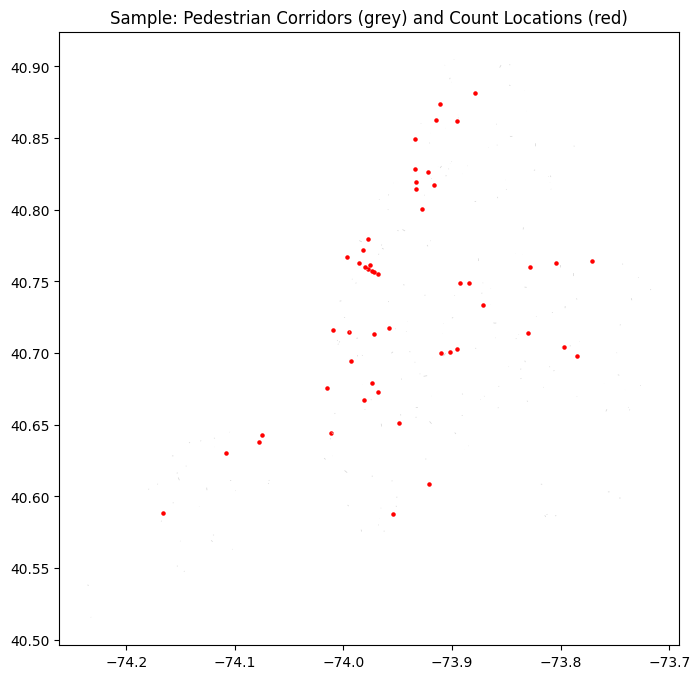

In [9]:
from shapely import wkt

# Convert geometries
counts['geometry'] = counts['the_geom'].apply(wkt.loads)
demand['geometry'] = demand['the_geom'].apply(wkt.loads)

gdf_counts = gpd.GeoDataFrame(counts, geometry='geometry', crs="EPSG:4326")
gdf_demand = gpd.GeoDataFrame(demand, geometry='geometry', crs="EPSG:4326")

# Plot small sample
fig, ax = plt.subplots(figsize=(8,8))
gdf_demand.sample(200).plot(ax=ax, color='lightgrey', linewidth=0.5)
gdf_counts.sample(50).plot(ax=ax, color='red', markersize=5)
plt.title("Sample: Pedestrian Corridors (grey) and Count Locations (red)")
plt.show()


In [10]:
# Look at all column
print(counts.columns.tolist())
print(demand.columns.tolist())

# See % of missing values
(counts.isna().mean() * 100).sort_values(ascending=False).head(15)
(demand.isna().mean() * 100).sort_values(ascending=False).head(15)


['the_geom', 'OBJECTID', 'Loc', 'Borough', 'Street_Nam', 'From_Stree', 'To_Street', 'Iex', 'May07_AM', 'May07_PM', 'May07_MD', 'Sept07_AM', 'Sept07_PM', 'Sept07_MD', 'May08_AM', 'May08_PM', 'May08_MD', 'Sept08_AM', 'Sept08_PM', 'Sept08_MD', 'May09_AM', 'May09_PM', 'May09_MD', 'Sept09_AM', 'Sept09_PM', 'Sept09_MD', 'May10_AM', 'May10_PM', 'May10_MD', 'Sept10_AM', 'Sept10_PM', 'Sept10_MD', 'May11_AM', 'May11_PM', 'May11_MD', 'Sept11_AM', 'Sept11_PM', 'Sept11_MD', 'May12_AM', 'May12_PM', 'May12_MD', 'Sept12_AM', 'Sept12_PM', 'Sept12_MD', 'May13_AM', 'May13_PM', 'May13_MD', 'Sept13_AM', 'Sept13_PM', 'Sept13_MD', 'May14_AM', 'May14_PM', 'May14_MD', 'Sept14_AM', 'Sept14_PM', 'Sept14_MD', 'May15_AM', 'May15_PM', 'May15_MD', 'Sept15_AM', 'Sept15_PM', 'Sept15_MD', 'May16_AM', 'May16_PM', 'May16_MD', 'Sept16_AM', 'Sept16_PM', 'Sept16_MD', 'May17_AM', 'May17_PM', 'May17_MD', 'Sept17_AM', 'Sept17_PM', 'Sept17_MD', 'May18_AM', 'May18_PM', 'May18_MD', 'Sept18_AM', 'Sept18_PM', 'Sept18_MD', 'May19_AM

HrcEvac         52.288316
FEMAFldT         4.482350
FEMAFldz         0.021214
NTAName          0.003928
the_geom         0.000000
BoroCode         0.000000
street_clean     0.000000
SHAPE_Leng       0.000000
Category         0.000000
Boro             0.000000
NTA2020          0.000000
PMP_ID           0.000000
Rank             0.000000
segmentid        0.000000
street           0.000000
dtype: float64

In [11]:
counts_clean = counts[['OBJECTID', 'Borough', 'Street_Nam', 'From_Stree', 'To_Street', 'the_geom'] + numeric_cols]
demand_clean = demand[['BoroName', 'street', 'Category', 'segmentid', 'the_geom']]

In [12]:
counts_clean['Street_Nam_lower'] = counts_clean['Street_Nam'].str.lower().str.strip()
demand_clean['street_lower'] = demand_clean['street'].str.lower().str.strip()

for boro in demand_clean['BoroName'].unique():
    c_boro = counts_clean[counts_clean['Borough'].str.lower() == boro.lower()]
    d_boro = demand_clean[demand_clean['BoroName'] == boro]
    overlap = len(set(c_boro['Street_Nam_lower']).intersection(d_boro['street_lower']))
    print(f"{boro}: {overlap} overlapping streets")


Queens: 17 overlapping streets
Staten Island: 0 overlapping streets
Manhattan: 13 overlapping streets
Bronx: 5 overlapping streets
Brooklyn: 18 overlapping streets
Brooklyn,Queens: 0 overlapping streets
Manhattan,Brooklyn: 0 overlapping streets
Manhattan,Bronx: 0 overlapping streets
Manhattan,Queens: 0 overlapping streets


/var/folders/lk/jc1xpyts52bb7wfnbfg2341m0000gn/T/ipykernel_13902/793986259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts_clean['Street_Nam_lower'] = counts_clean['Street_Nam'].str.lower().str.strip()
/var/folders/lk/jc1xpyts52bb7wfnbfg2341m0000gn/T/ipykernel_13902/793986259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_clean['street_lower'] = demand_clean['street'].str.lower().str.strip()
